In [1]:
import torch
import matplotlib.pyplot as plt
from gan.model import Generator   # adjust import path to your project


In [2]:
# Path to your saved generator checkpoint
checkpoint_path = "/users/5/raj00075/Desktop/Anomaly_detection/KM_VERITAS_GAN/outputs/gan_checkpoints/generator_ep_100.pth"  # e.g., generator_ep_100.pth

# Recreate the generator architecture exactly as during training
n_z = 256
gen = Generator(n_z=n_z, input_filt=512, n_layers=5, out_channels=3, final_size=512)
gen.load_state_dict(torch.load(checkpoint_path, map_location="cpu"))
gen.eval()
gen.to("cuda")


/tmp/ipykernel_30304/3223747149.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  gen.load_state_dict(torch.load(checkpoint_path, map_location="cpu"))


Generator(
  (0): Linear(in_features=256, out_features=131072, bias=True)
  (1): LeakyReLU(negative_slope=0.2, inplace=True)
  (2): Rearrange('b (h w z) -> b z h w', h=16, w=16, z=512)
  (3): UpConvLayer(
    (0): ConvTranspose2d(512, 256, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
  )
  (4): UpConvLayer(
    (0): ConvTranspose2d(256, 128, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
  )
  (5): UpConvLayer(
    (0): ConvTranspose2d(128, 64, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
  )
  (6): UpConvLayer(
    (0): ConvTranspose2d(64, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
  )
  (7): UpConvLayer(
    (0): ConvTranspose2d(32, 16, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
  )
  (8)

In [3]:
# Number of samples to generate
num_samples = 10

# Sample random latent vectors
z = torch.randn(num_samples, n_z).to("cuda")

# Generate images
with torch.no_grad():
    fake_imgs = gen(z).cpu()

fake_imgs.shape


torch.Size([10, 3, 512, 512])

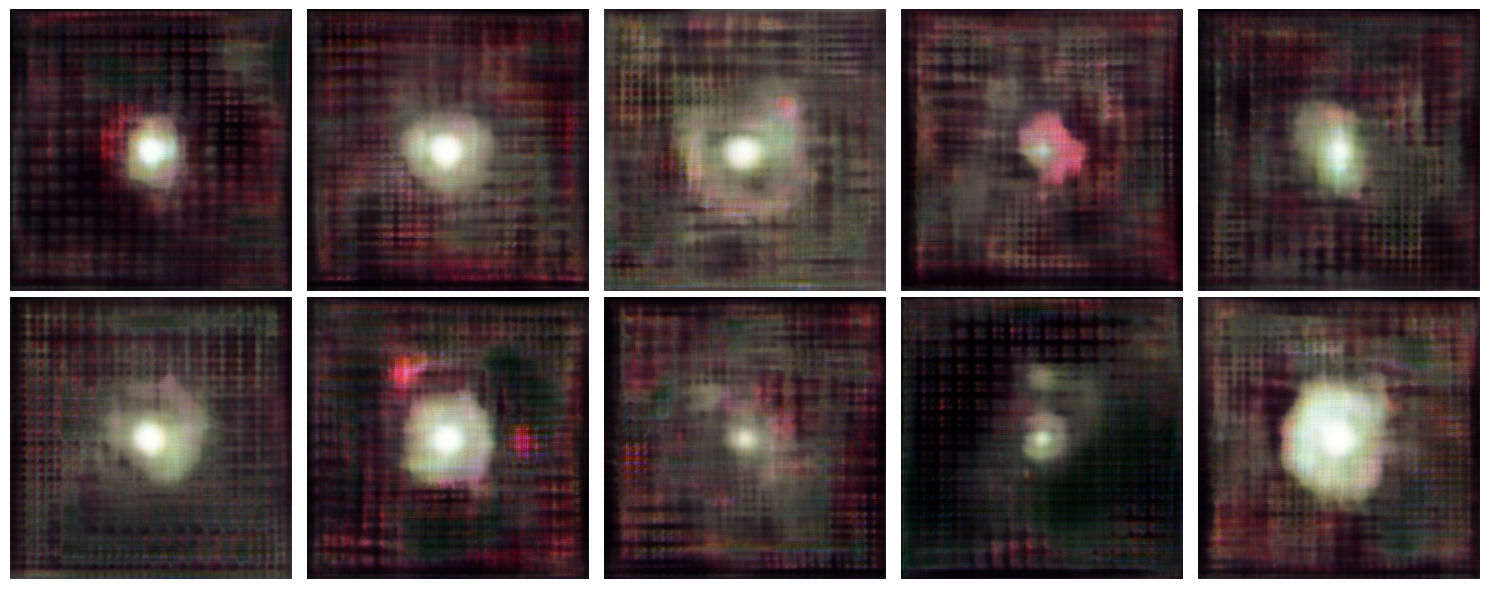

In [4]:
fig, axes = plt.subplots(2, 5, figsize=(15, 6))

for ax, img in zip(axes.flatten(), fake_imgs):
    ax.imshow(img.permute(1, 2, 0).numpy(), cmap="gray")
    ax.axis("off")

plt.tight_layout()
plt.show()


In [5]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

h5_path = "anomaly.h5"   # update this

h5 = h5py.File(h5_path, "r")

# List the first few keys
keys = list(h5.keys())
print("Number of images:", len(keys))
print("First 5 keys:", keys[:5])


Number of images: 100994
First 5 keys: ['112449833_ad74a4b2-9c86-48f8-94d8-e32f1de507a1.jpeg', '112449834_9e07c598-dd61-47e8-8fbd-49cf9396b4a4.jpeg', '112449835_96999f8a-09db-4d5d-81c4-412f845bbe04.jpeg', '112449836_5a6f7c13-7f8e-4550-a605-f8abdd6292dc.jpeg', '112449837_2c6dd1dd-85fd-4092-b365-a7d9729f05f2.jpeg']


In [6]:
from gan_utils.io import H5ImageDataset   # adjust import path to your project
from torch.utils.data import DataLoader
import pandas as pd


In [ ]:
df = pd.read_parquet("mask_labels_anomaly.gzip")


In [ ]:
dataset = H5ImageDataset(
    df=df,
    h5_path="anomaly.h5",
    key_col="file_name",
    transforms=None,   # or whatever you normally use
    verify_keys=False
)


In [ ]:
loader = DataLoader(dataset, batch_size=4, shuffle=False)


In [ ]:
batch = next(iter(loader))

print("Batch shape:", batch.shape)
print("Min:", batch.min().item())
print("Max:", batch.max().item())
print("Mean:", batch.mean().item())
print("Std:", batch.std().item())
print("Dtype:", batch.dtype)
